In [47]:
import numpy as np
import pandas as pd

In [48]:
df = pd.read_csv('/content/clinvar_conflicting.csv')
df.head(5)

<ipython-input-48-87c7ffb85589>:1: DtypeWarning: Columns (0,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/clinvar_conflicting.csv')


,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,...,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,...,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,...,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0


In [49]:
df.shape

(65188, 46)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHROM               65188 non-null  object 
 1   POS                 65188 non-null  int64  
 2   REF                 65188 non-null  object 
 3   ALT                 65188 non-null  object 
 4   AF_ESP              65188 non-null  float64
 5   AF_EXAC             65188 non-null  float64
 6   AF_TGP              65188 non-null  float64
 7   CLNDISDB            65188 non-null  object 
 8   CLNDISDBINCL        167 non-null    object 
 9   CLNDN               65188 non-null  object 
 10  CLNDNINCL           167 non-null    object 
 11  CLNHGVS             65188 non-null  object 
 12  CLNSIGINCL          167 non-null    object 
 13  CLNVC               65188 non-null  object 
 14  CLNVI               27659 non-null  object 
 15  MC                  64342 non-null  object 
 16  ORIG

In [51]:
df.isna().sum()

CHROM                     0
POS                       0
REF                       0
ALT                       0
AF_ESP                    0
AF_EXAC                   0
AF_TGP                    0
CLNDISDB                  0
CLNDISDBINCL          65021
CLNDN                     0
CLNDNINCL             65021
CLNHGVS                   0
CLNSIGINCL            65021
CLNVC                     0
CLNVI                 37529
MC                      846
ORIGIN                    0
SSR                   65058
CLASS                     0
Allele                    0
Consequence               0
IMPACT                    0
SYMBOL                   16
Feature_type             14
Feature                  14
BIOTYPE                  16
EXON                   8893
INTRON                56385
cDNA_position          8884
CDS_position           9955
Protein_position       9955
Amino_acids           10004
Codons                10004
DISTANCE              65080
STRAND                   14
BAM_EDIT            

In [52]:
df.drop(['CLNDISDBINCL' ,'CLNDNINCL' ,'CLNSIGINCL' ,'CLNVI' ,'SSR' ,'INTRON' ,'DISTANCE'
         ,'BAM_EDIT' ,'SIFT' ,'PolyPhen' ,'MOTIF_NAME' ,'MOTIF_POS' ,'HIGH_INF_POS'
         ,'MOTIF_SCORE_CHANGE' ,'BLOSUM62'] ,axis = 1 ,inplace = True)

In [53]:
df.nunique()

CHROM                  38
POS                 63115
REF                   866
ALT                   458
AF_ESP               2842
AF_EXAC              6667
AF_TGP               2087
CLNDISDB             9234
CLNDN                9260
CLNHGVS             65188
CLNVC                   7
MC                     90
ORIGIN                 31
CLASS                   2
Allele                374
Consequence            48
IMPACT                  4
SYMBOL               2328
Feature_type            2
Feature              2369
BIOTYPE                 2
EXON                 3264
cDNA_position       13970
CDS_position        13663
Protein_position     7339
Amino_acids          1262
Codons               2220
STRAND                  2
LoFtool              1195
CADD_PHRED           9324
CADD_RAW            63803
dtype: int64

In [54]:
labels = ['CLNDISDB', 'CLNDN', 'CLNHGVS', 'CLNVC', 'Codons']
df.drop(labels, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  object 
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  object 
 3   ALT               65188 non-null  object 
 4   AF_ESP            65188 non-null  float64
 5   AF_EXAC           65188 non-null  float64
 6   AF_TGP            65188 non-null  float64
 7   MC                64342 non-null  object 
 8   ORIGIN            65188 non-null  int64  
 9   CLASS             65188 non-null  int64  
 10  Allele            65188 non-null  object 
 11  Consequence       65188 non-null  object 
 12  IMPACT            65188 non-null  object 
 13  SYMBOL            65172 non-null  object 
 14  Feature_type      65174 non-null  object 
 15  Feature           65174 non-null  object 
 16  BIOTYPE           65172 non-null  object

In [55]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Iterate over each column in the dataframe
for column in df.columns:
    # Check if the column's dtype is 'object'
    if df[column].dtype == 'object':
        # Apply label encoding to the column after converting to string
        df[column] = label_encoder.fit_transform(df[column].astype(str))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  int64  
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  int64  
 3   ALT               65188 non-null  int64  
 4   AF_ESP            65188 non-null  float64
 5   AF_EXAC           65188 non-null  float64
 6   AF_TGP            65188 non-null  float64
 7   MC                65188 non-null  int64  
 8   ORIGIN            65188 non-null  int64  
 9   CLASS             65188 non-null  int64  
 10  Allele            65188 non-null  int64  
 11  Consequence       65188 non-null  int64  
 12  IMPACT            65188 non-null  int64  
 13  SYMBOL            65188 non-null  int64  
 14  Feature_type      65188 non-null  int64  
 15  Feature           65188 non-null  int64  
 16  BIOTYPE           65188 non-null  int64 

In [56]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
scaled_standard =sc.fit_transform(df)
scaled_standard_df = pd.DataFrame(scaled_standard, columns=df.columns)
print("\nStandardized Data:")
print(scaled_standard_df)


Standardized Data:
          CHROM       POS       REF       ALT    AF_ESP   AF_EXAC    AF_TGP  \
0     -1.512662 -1.279004  0.536855 -0.440465  1.082957  1.439460  1.534372   
1     -1.512662 -1.273939  0.536855 -1.211217 -0.251069 -0.243396 -0.256413   
2     -1.512662 -1.269467 -1.625031  0.337559 -0.251069 -0.243228 -0.256413   
3     -1.512662 -1.262397  0.536855 -1.211217 -0.251069 -0.243396 -0.256413   
4     -1.512662 -1.262397  0.536855  1.224652 -0.251069 -0.243396 -0.256413   
...         ...       ...       ...       ...       ...       ...       ...   
65183  1.967075  1.281925  1.560906  0.337559  1.134865  2.094968  2.439844   
65184  1.967075  1.281940 -0.516879  1.224652 -0.216464 -0.233319 -0.234574   
65185  1.967075  1.282539 -0.516879  1.224652 -0.034787 -0.181254 -0.069943   
65186  1.967075  1.287482  1.560906 -0.440465 -0.245878 -0.237685 -0.256413   
65187  1.967075  1.287789  0.536855 -0.440465 -0.218194 -0.198553 -0.242974   

             MC    ORIGIN     C

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  int64  
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  int64  
 3   ALT               65188 non-null  int64  
 4   AF_ESP            65188 non-null  float64
 5   AF_EXAC           65188 non-null  float64
 6   AF_TGP            65188 non-null  float64
 7   MC                65188 non-null  int64  
 8   ORIGIN            65188 non-null  int64  
 9   CLASS             65188 non-null  int64  
 10  Allele            65188 non-null  int64  
 11  Consequence       65188 non-null  int64  
 12  IMPACT            65188 non-null  int64  
 13  SYMBOL            65188 non-null  int64  
 14  Feature_type      65188 non-null  int64  
 15  Feature           65188 non-null  int64  
 16  BIOTYPE           65188 non-null  int64 

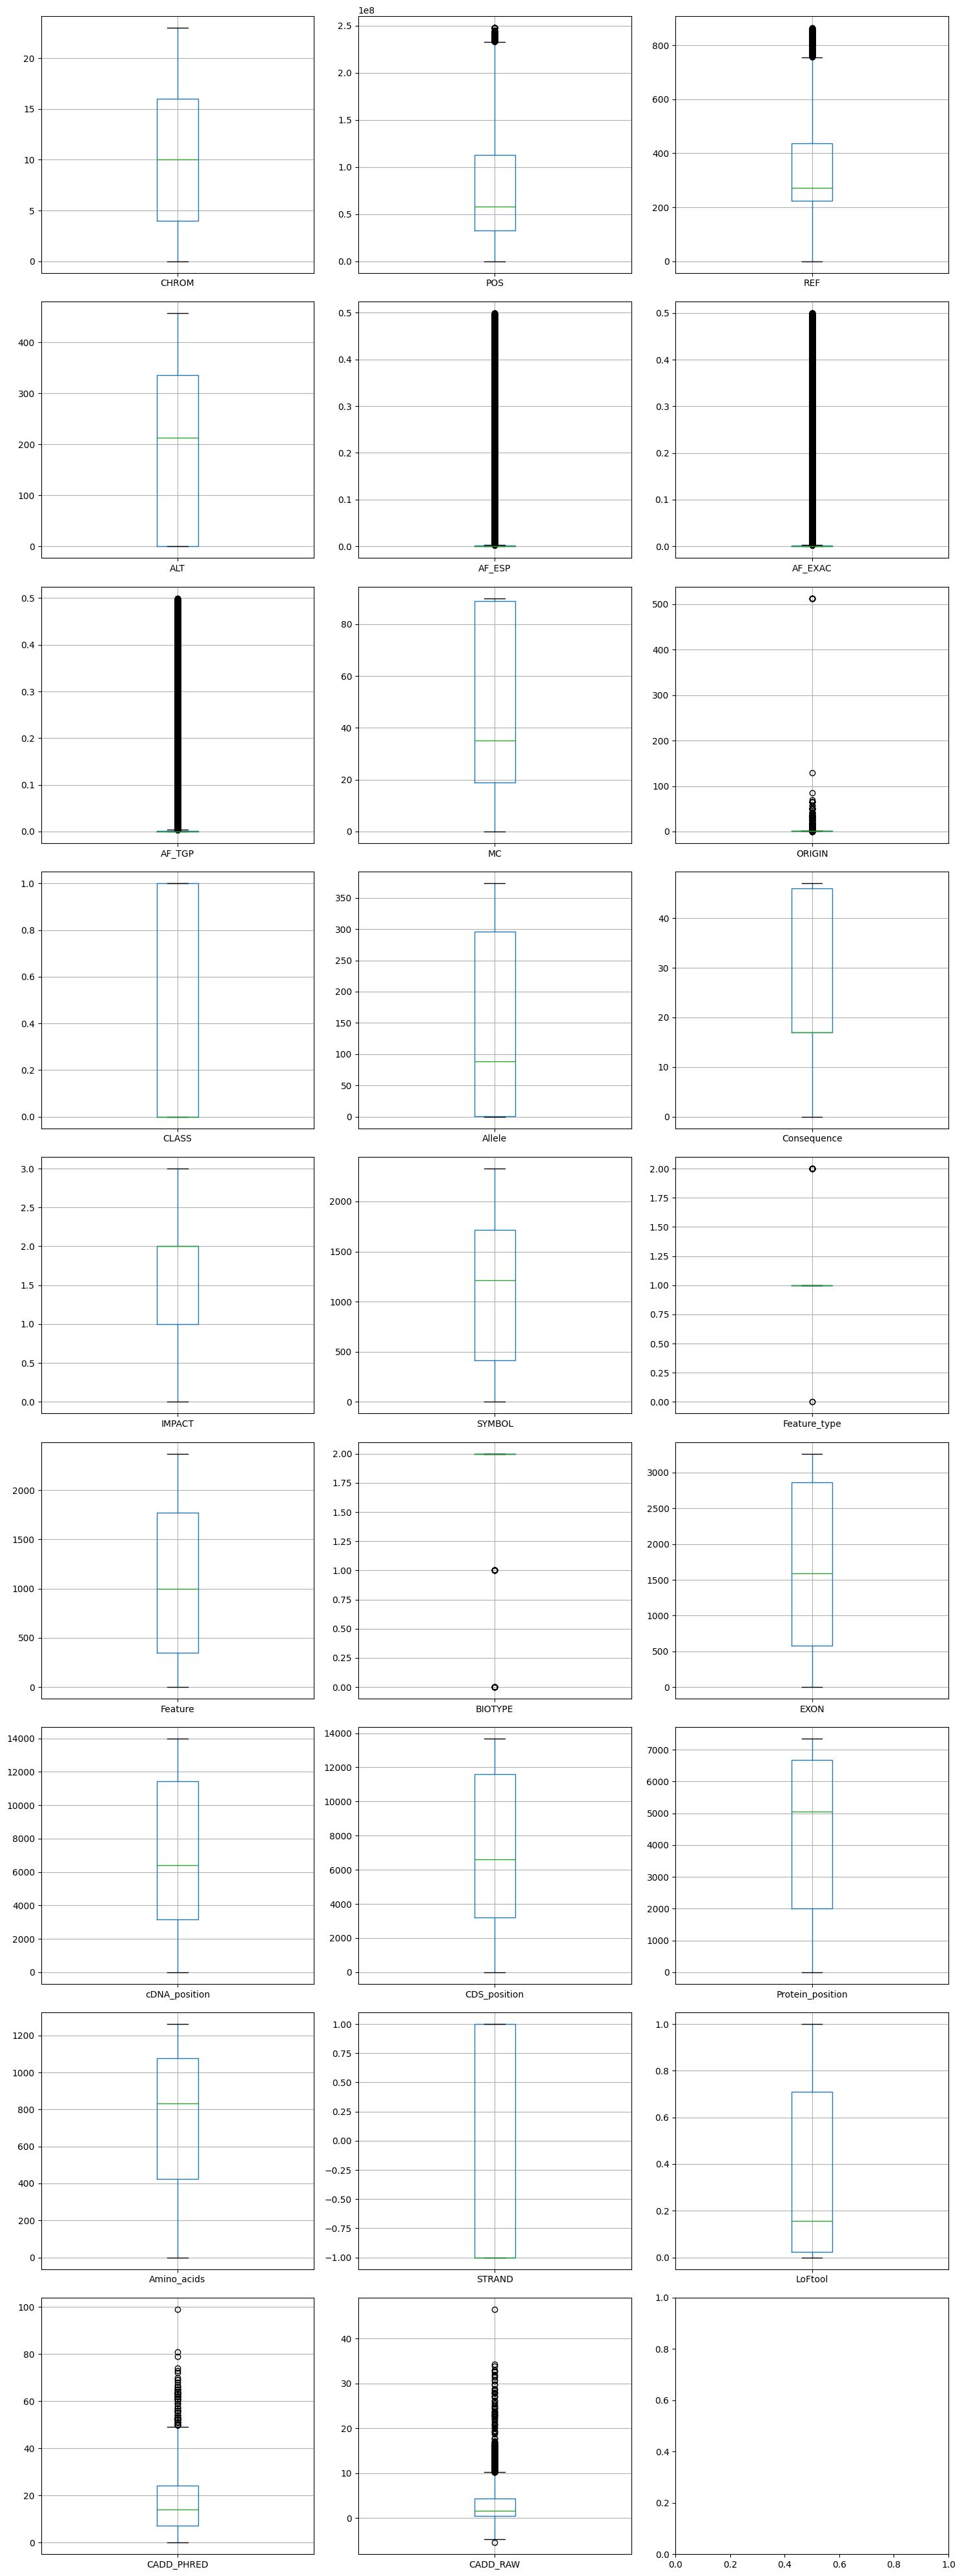

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
#df_numeric = df.select_dtypes(include=['number'])
num_columns = 3
num_rows = (len(df.columns) - 1) // num_columns + 1
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 40))

# Iterate through columns and plot boxplots
for i, column in enumerate(df.columns):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row][col]

    df.boxplot(column=column, ax=ax)


# Adjust layout and display the plots
plt.tight_layout()
plt.show()

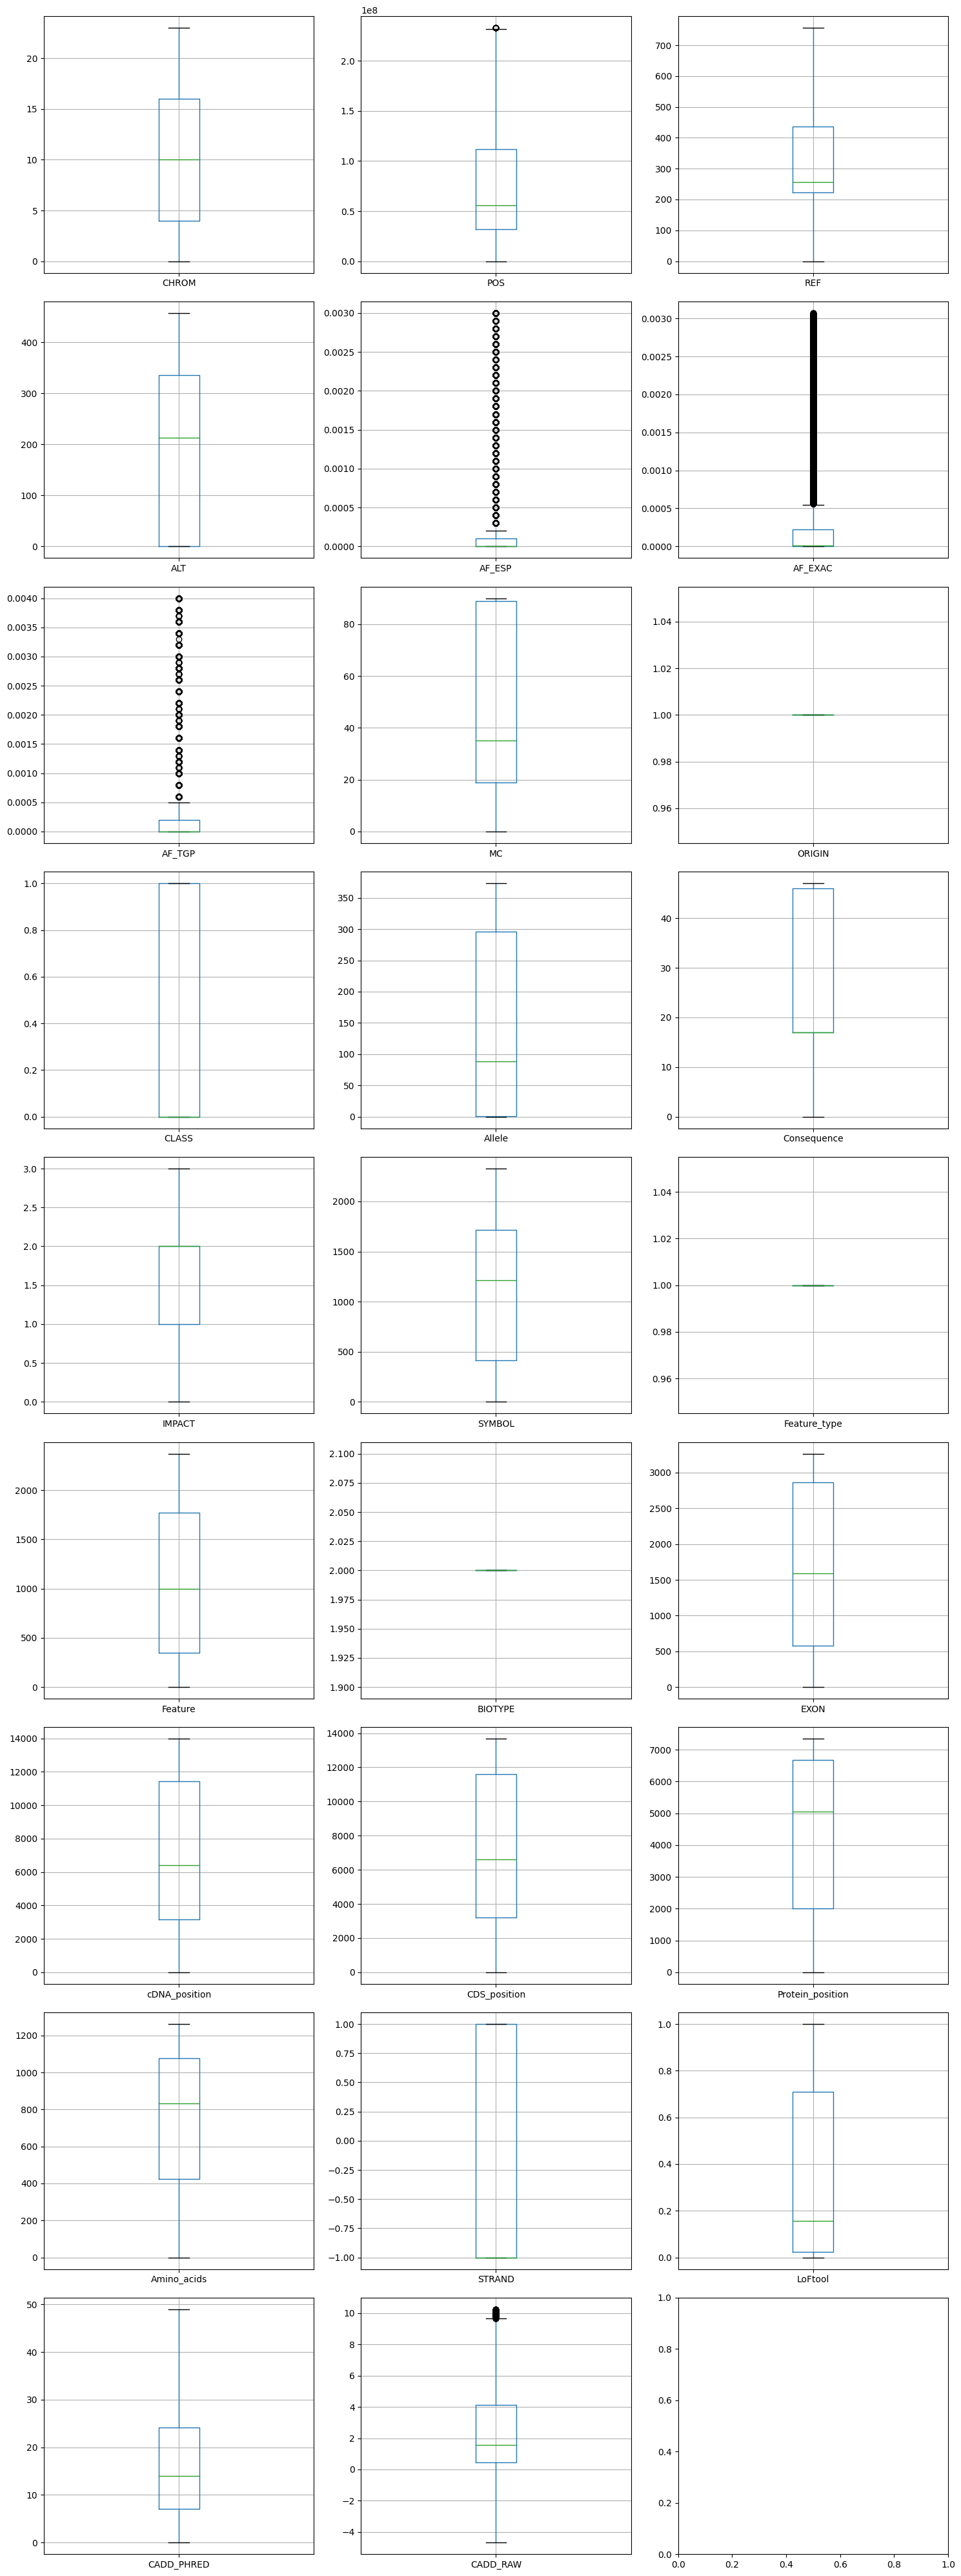

In [59]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]

# Remove outliers for each column
df_clean = df.apply(remove_outliers, axis=0)

# Visualize box plots for clean data
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 40))

# Iterate through columns and plot boxplots
for i, column in enumerate(df_clean.columns):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row][col]
    if column in df.columns:
       df_clean.boxplot(column=column, ax=ax)
    else:
       print(f"Column '{column}' not found in df_numeric")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  int64  
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  int64  
 3   ALT               65188 non-null  int64  
 4   AF_ESP            65188 non-null  float64
 5   AF_EXAC           65188 non-null  float64
 6   AF_TGP            65188 non-null  float64
 7   MC                65188 non-null  int64  
 8   ORIGIN            65188 non-null  int64  
 9   CLASS             65188 non-null  int64  
 10  Allele            65188 non-null  int64  
 11  Consequence       65188 non-null  int64  
 12  IMPACT            65188 non-null  int64  
 13  SYMBOL            65188 non-null  int64  
 14  Feature_type      65188 non-null  int64  
 15  Feature           65188 non-null  int64  
 16  BIOTYPE           65188 non-null  int64 

In [61]:
df_clean.isna().sum()

CHROM                   0
POS                  1197
REF                   180
ALT                     0
AF_ESP              12721
AF_EXAC             11866
AF_TGP              12037
MC                      0
ORIGIN               1248
CLASS                   0
Allele                  0
Consequence             0
IMPACT                  0
SYMBOL                  0
Feature_type           16
Feature                 0
BIOTYPE                30
EXON                    0
cDNA_position           0
CDS_position            0
Protein_position        0
Amino_acids             0
STRAND                 14
LoFtool              4213
CADD_PHRED           1223
CADD_RAW             2459
dtype: int64

In [62]:
df_clean['POS'] = df['POS'].fillna( df['POS'].mean())
df_clean['REF'] = df['REF'].fillna( df['REF'].mean())
df_clean.dropna(subset=['STRAND'], inplace=True)
df_clean.dropna(subset=['Feature_type'], inplace=True)
df_clean.drop(['AF_ESP','AF_EXAC','AF_TGP'], axis=1, inplace=True)
df_clean.dropna(subset=['BIOTYPE'], inplace=True)
most_frequent_value = df_clean['ORIGIN'].mode()[0]
df_clean['ORIGIN'] = df_clean['ORIGIN'].fillna(most_frequent_value)
df_clean['LoFtool'] = (df_clean['LoFtool'].fillna(method='ffill') + df['LoFtool'].fillna(method='bfill')) / 2
df_clean.dropna(subset=['CADD_PHRED'], inplace=True)
df_clean.dropna(subset=['CADD_RAW'], inplace=True)
df_clean.isna().sum()

CHROM               0
POS                 0
REF                 0
ALT                 0
MC                  0
ORIGIN              0
CLASS               0
Allele              0
Consequence         0
IMPACT              0
SYMBOL              0
Feature_type        0
Feature             0
BIOTYPE             0
EXON                0
cDNA_position       0
CDS_position        0
Protein_position    0
Amino_acids         0
STRAND              0
LoFtool             6
CADD_PHRED          0
CADD_RAW            0
dtype: int64

In [67]:
df_clean.shape

(62699, 23)

In [63]:
df_clean

,CHROM,POS,REF,ALT,MC,ORIGIN,CLASS,Allele,Consequence,IMPACT,...,BIOTYPE,EXON,cDNA_position,CDS_position,Protein_position,Amino_acids,STRAND,LoFtool,CADD_PHRED,CADD_RAW
0,0,1168180,437,106,19,1.0,0,88,17,2,...,2.0,0,8896,8316,1455,257,1.0,NaN,1.053,-0.208682
1,0,1470752,437,0,19,1.0,0,1,17,2,...,2.0,2037,8470,8140,1381,756,-1.0,NaN,31.000,6.517838
2,0,1737942,0,213,24,1.0,1,168,17,2,...,2.0,2657,9963,3998,6814,480,-1.0,NaN,28.100,6.061752
3,0,2160305,437,0,19,1.0,0,1,17,2,...,2.0,53,1616,4,4579,377,1.0,NaN,22.500,3.114491
4,0,2160305,437,335,19,1.0,0,296,17,2,...,2.0,53,1616,4,4579,362,1.0,NaN,24.700,4.766224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,23,154158201,644,213,89,1.0,0,168,46,1,...,2.0,431,6753,6393,566,968,-1.0,0.00158,0.105,-0.630908
65184,23,154159118,224,335,19,1.0,1,296,17,2,...,2.0,431,5343,4995,7289,1154,-1.0,0.00158,0.002,-1.731470
65185,23,154194886,224,335,89,1.0,0,296,46,1,...,2.0,3053,1359,656,4928,78,-1.0,0.00158,12.850,1.412434
65186,23,154490187,644,106,89,1.0,0,88,46,1,...,2.0,832,12153,8625,1613,1070,-1.0,0.07079,0.130,-0.592415


In [64]:
df_clean.columns

Index(['CHROM', 'POS', 'REF', 'ALT', 'MC', 'ORIGIN', 'CLASS', 'Allele',
       'Consequence', 'IMPACT', 'SYMBOL', 'Feature_type', 'Feature', 'BIOTYPE',
       'EXON', 'cDNA_position', 'CDS_position', 'Protein_position',
       'Amino_acids', 'STRAND', 'LoFtool', 'CADD_PHRED', 'CADD_RAW'],
      dtype='object')

In [65]:
grouped_test1 = df_clean.groupby(['CHROM'],as_index=False).mean()
grouped_test1

,CHROM,POS,REF,ALT,MC,ORIGIN,CLASS,Allele,Consequence,IMPACT,...,BIOTYPE,EXON,cDNA_position,CDS_position,Protein_position,Amino_acids,STRAND,LoFtool,CADD_PHRED,CADD_RAW
0,0,1.214608e+08,332.870797,167.134040,50.723630,1.0,0.277982,138.963381,25.763934,1.654076,...,2.0,1754.375633,7057.266928,7156.643943,4503.923998,764.299401,-0.136803,0.283376,15.780210,2.515834
1,1,7.487548e+07,327.088106,162.912335,52.038326,1.0,0.274449,135.038326,25.119383,1.732159,...,2.0,1695.515419,6593.021145,7197.175771,4693.952423,787.396916,0.481057,0.321788,15.210093,2.310914
2,2,7.584502e+07,318.445153,166.207518,47.453286,1.0,0.219829,136.959991,24.779952,1.613322,...,2.0,1797.574852,7758.040009,7648.620796,4279.655749,768.387118,0.285997,0.482196,16.544414,2.708855
3,3,7.240827e+07,332.805701,162.831583,55.540135,1.0,0.243061,135.822581,27.587022,1.616654,...,2.0,1748.235559,7259.993998,7319.227682,4358.430233,757.545011,-0.325581,0.423307,14.729979,2.223274
4,4,3.743502e+07,295.682037,166.432237,35.185245,1.0,0.301123,135.621893,20.297915,1.823577,...,2.0,1080.807939,8718.550922,8578.160385,3881.602646,733.120289,0.655974,0.133824,13.985150,2.110078
5,5,6.145417e+07,325.867816,164.446186,50.254441,1.0,0.296761,138.155695,26.719958,1.655695,...,2.0,1573.302508,6868.721003,6892.479624,4134.899164,731.671891,-0.330199,0.277661,15.097873,2.320036
6,6,6.296416e+07,331.596386,166.642771,50.739157,1.0,0.300602,135.922289,25.682530,1.660843,...,2.0,1709.492169,7250.232530,7296.281325,4388.000602,737.189759,-0.213253,0.303073,16.055763,2.560253
7,7,3.413079e+07,331.766579,164.525789,50.716316,1.0,0.235000,137.707105,26.566842,1.622368,...,2.0,1675.446579,6621.751842,6681.012105,4469.231316,743.715789,0.038947,0.377991,13.400566,1.953676
8,8,3.992640e+07,334.507866,161.966013,47.570790,1.0,0.238881,133.466110,24.205865,1.680132,...,2.0,1687.605943,7516.258691,7501.458341,4280.861915,767.787532,-0.285687,0.235422,15.617584,2.458484
9,9,3.458396e+07,330.642202,158.761468,50.431193,1.0,0.271789,131.415138,25.527523,1.694954,...,2.0,1587.684633,6661.777523,6927.582569,4639.384174,782.411697,-0.018349,0.376544,14.816243,2.267961


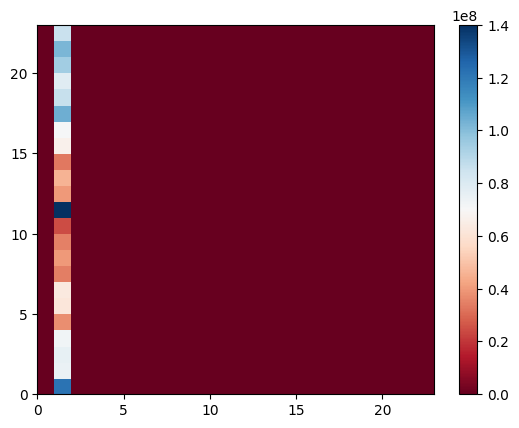

In [66]:
plt.pcolor(grouped_test1, cmap='RdBu')
plt.colorbar()
plt.show()